<a href="https://colab.research.google.com/github/mehakmalik28/GRIP-Sparks-Foundation/blob/master/LinearRegressionTask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Task 2 : Linear Regression ***

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
print("dataset downloaded")
##taking glance at the data
data.head(10)

dataset downloaded


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
##checking the shape
data.shape

(25, 2)

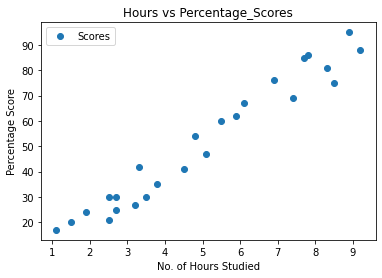

In [ ]:
#Plotting the distribution of scores with respect to hours
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage_Scores')  
plt.xlabel('No. of Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

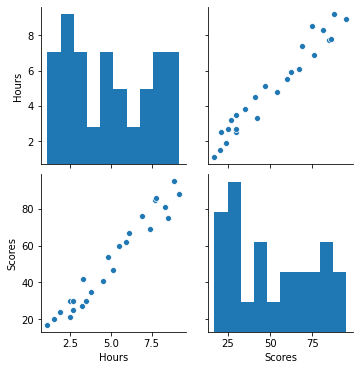

In [ ]:
#doing pairplotting
sns.pairplot(data)

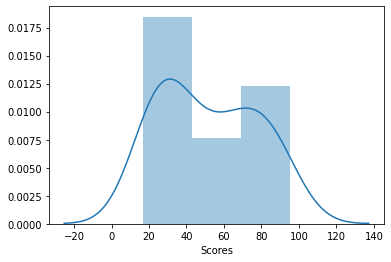

In [ ]:
##checking the distribution of scores
sns.distplot(data['Scores'])

The distribution of our scores is not perfect guassian.But as we have less data it will not affect our performance much.Hence, not applying normalization or scaling.

**Preparing the data**
The data contains two variables one is our dependent variable(Hour) and other is independent variable or label(Scores). So we will assign them as their designation.

In [ ]:
## getting location of feature values and target 
X = data.iloc[:,:-1].values ##all the rows of all columns except the last column as that is our label
y = data.iloc[:,1].values   ##the label column with all of its rows
from sklearn.model_selection import train_test_split  
x_train, x_valid, y_train, y_valid = train_test_split(X, y, 
                            test_size=0.2, random_state=0)
##importing our model and fitting to the training dataset
from sklearn.linear_model import LinearRegression
lgr = LinearRegression()
lgr.fit(x_train,y_train)
print('Training Completed')

Training Completed


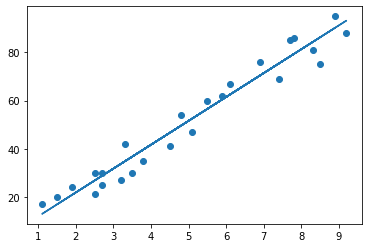

In [ ]:
# Plotting the regression line
line = lgr.coef_*X+lgr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

**Making prediction**
We have trained our model using training dataset. Now we will predict the outputs on test dataset using the trained model.

In [ ]:
##testing the model by making prediction on our test dataset
y_prediction = lgr.predict(x_valid)

**Performance Evaluating**

We have predicted the outputs on our test dataset. Now is the time to evaluate the performance of our model using r2_score, mean_squared_error and mean_absolute_error. We will import these metrices from scikit_learn library.

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
score = r2_score(y_prediction,y_valid)
mse = mean_squared_error(y_prediction,y_valid)
mae = mean_absolute_error(y_prediction,y_valid)

print('r2_score: {}'.format(score))
print('mean_squared_error: {}'.format(mse))
print('Mean Absolute Error:',mae)

r2_score: 0.9546785947197246
mean_squared_error: 21.598769307217456
Mean Absolute Error: 4.183859899002982


In [ ]:
# Comparing Actual vs Predicted after combining them into a dataframe
df_label = pd.DataFrame({'Actual': y_valid, 'Predicted': y_prediction})  
df_label

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


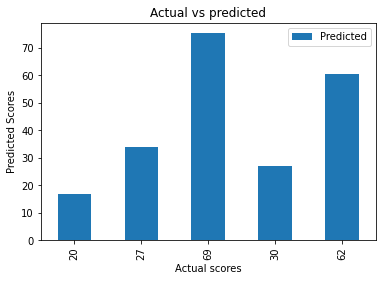

In [ ]:
# Plotting the prediction with actual values
df_label.plot(x='Actual', y='Predicted',kind = 'bar')  
plt.title('Actual vs predicted')  
plt.xlabel('Actual scores')  
plt.ylabel('Predicted Scores')  
plt.show()


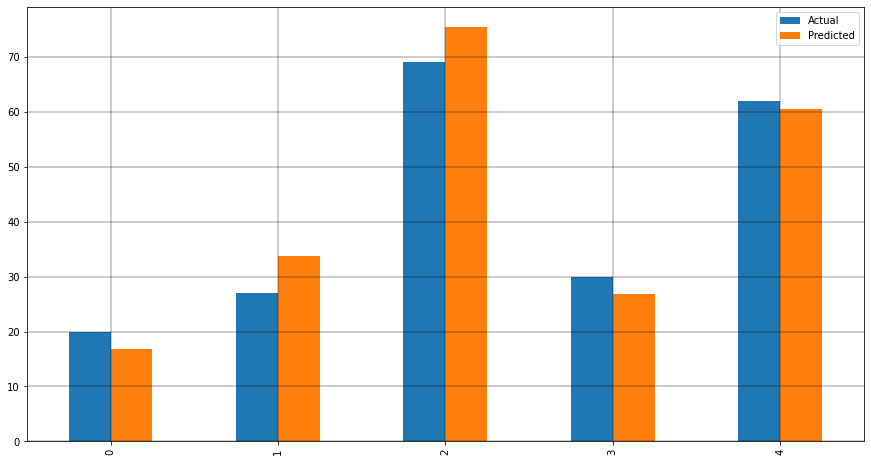

In [ ]:
# We can also visualize comparison result as a bar graph
df1 = df_label.head()
df1.plot(kind='bar',figsize=(15,8))
plt.grid(which='major', linestyle='-', linewidth='0.4', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.4', color='black')
plt.show()

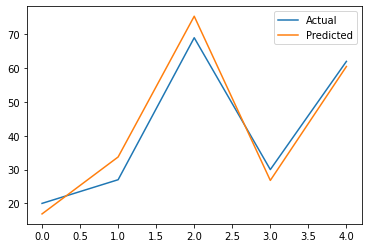

In [ ]:
df_label.plot()

**Predicting score**

Now we will be predicting the scores with respect to 9.25 hours of study using our trained model.

In [ ]:
hour = [[9.25]]
pred_score = lgr.predict(hour)
print('hour_studied: {}'.format(hour))
print('Score_prediced: {}'.format(pred_score))

hour_studied: [[9.25]]
Score_prediced: [93.69173249]
